In [1]:
import urllib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://api.covid19api.com/summary"
response = urllib.request.urlopen(url)
jsondata = json.loads(response.read())
print(jsondata['Countries'])

[{'Country': 'ALA Aland Islands', 'CountryCode': 'AX', 'Slug': 'ala-aland-islands', 'NewConfirmed': 0, 'TotalConfirmed': 0, 'NewDeaths': 0, 'TotalDeaths': 0, 'NewRecovered': 0, 'TotalRecovered': 0, 'Date': '2020-04-22T01:15:47Z'}, {'Country': 'Afghanistan', 'CountryCode': 'AF', 'Slug': 'afghanistan', 'NewConfirmed': 66, 'TotalConfirmed': 1092, 'NewDeaths': 0, 'TotalDeaths': 36, 'NewRecovered': 15, 'TotalRecovered': 150, 'Date': '2020-04-22T01:15:47Z'}, {'Country': 'Albania', 'CountryCode': 'AL', 'Slug': 'albania', 'NewConfirmed': 25, 'TotalConfirmed': 609, 'NewDeaths': 0, 'TotalDeaths': 26, 'NewRecovered': 18, 'TotalRecovered': 345, 'Date': '2020-04-22T01:15:47Z'}, {'Country': 'Algeria', 'CountryCode': 'DZ', 'Slug': 'algeria', 'NewConfirmed': 93, 'TotalConfirmed': 2811, 'NewDeaths': 8, 'TotalDeaths': 392, 'NewRecovered': 53, 'TotalRecovered': 1152, 'Date': '2020-04-22T01:15:47Z'}, {'Country': 'American Samoa', 'CountryCode': 'AS', 'Slug': 'american-samoa', 'NewConfirmed': 0, 'TotalConf

In [3]:
df=pd.json_normalize(jsondata['Countries'])
print(df)

                       Country CountryCode                       Slug  \
0            ALA Aland Islands          AX          ala-aland-islands   
1                  Afghanistan          AF                afghanistan   
2                      Albania          AL                    albania   
3                      Algeria          DZ                    algeria   
4               American Samoa          AS             american-samoa   
..                         ...         ...                        ...   
242  Wallis and Futuna Islands          WF  wallis-and-futuna-islands   
243             Western Sahara          EH             western-sahara   
244                      Yemen          YE                      yemen   
245                     Zambia          ZM                     zambia   
246                   Zimbabwe          ZW                   zimbabwe   

     NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  NewRecovered  \
0               0               0          0    

In [4]:
df.describe()

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,331.372470,10199.121457,27.481781,700.307692,138.983806,2749.396761
std,2213.936489,57647.437488,188.821437,3939.543528,709.757676,12024.166476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.000000,0.000000,4.000000,0.000000,28.000000
75%,50.500000,1843.000000,1.000000,45.500000,24.000000,402.500000
max,33253.000000,816963.000000,2706.000000,44781.000000,9156.000000,95200.000000


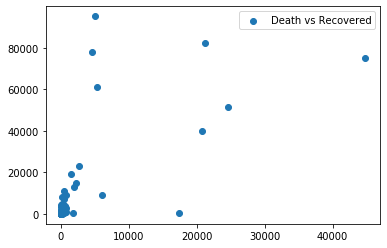

In [5]:
fig, ax = plt.subplots()
ax.scatter(df['TotalDeaths'],df['TotalRecovered'],label='Death vs Recovered')
leg = ax.legend();

In [6]:
df['DeathRate']=df['TotalDeaths']*100/(df['TotalRecovered']+df['TotalDeaths'])
df['RecoveredRate']=df['TotalRecovered']*100/(df['TotalRecovered']+df['TotalDeaths'])
print(df)
df.describe()

                       Country CountryCode                       Slug  \
0            ALA Aland Islands          AX          ala-aland-islands   
1                  Afghanistan          AF                afghanistan   
2                      Albania          AL                    albania   
3                      Algeria          DZ                    algeria   
4               American Samoa          AS             american-samoa   
..                         ...         ...                        ...   
242  Wallis and Futuna Islands          WF  wallis-and-futuna-islands   
243             Western Sahara          EH             western-sahara   
244                      Yemen          YE                      yemen   
245                     Zambia          ZM                     zambia   
246                   Zimbabwe          ZW                   zimbabwe   

     NewConfirmed  TotalConfirmed  NewDeaths  TotalDeaths  NewRecovered  \
0               0               0          0    

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,DeathRate,RecoveredRate
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,176.000000,176.000000
mean,331.372470,10199.121457,27.481781,700.307692,138.983806,2749.396761,16.849314,83.150686
std,2213.936489,57647.437488,188.821437,3939.543528,709.757676,12024.166476,20.240219,20.240219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.776196,77.688172
50%,1.000000,122.000000,0.000000,4.000000,0.000000,28.000000,10.315710,89.684290
75%,50.500000,1843.000000,1.000000,45.500000,24.000000,402.500000,22.311828,97.223804
max,33253.000000,816963.000000,2706.000000,44781.000000,9156.000000,95200.000000,100.000000,100.000000


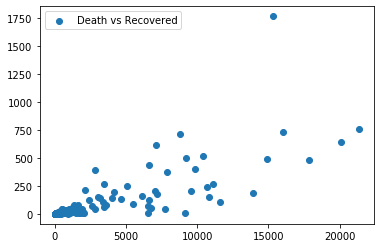

In [7]:
fig, ax = plt.subplots()
ax.scatter(df[df['TotalConfirmed']<25000]['TotalConfirmed'],df[df['TotalConfirmed']<25000]['TotalDeaths'],
           label='Death vs Recovered')
leg = ax.legend();

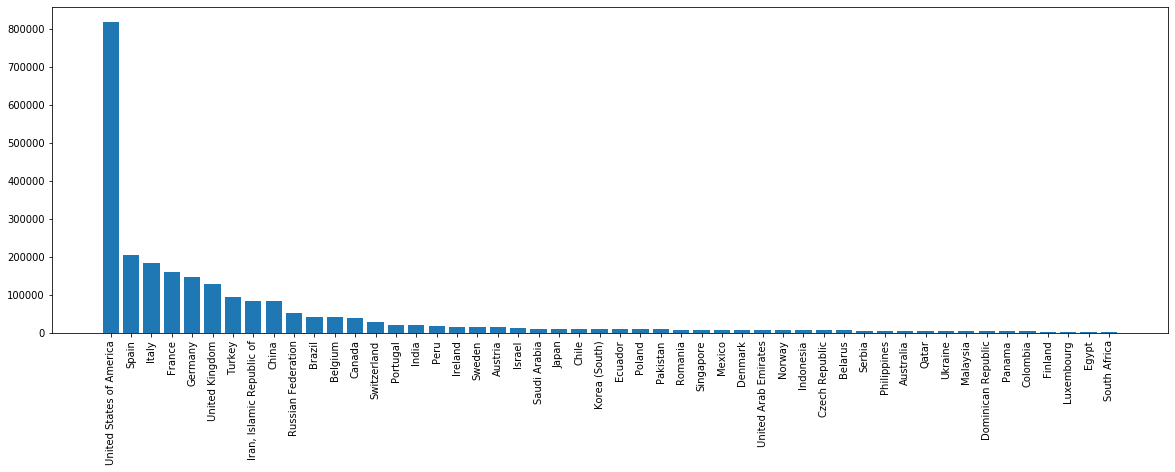

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=df.sort_values(by='TotalConfirmed',ascending=False).head(50)
plt.bar(a1f['Country'],a1f['TotalConfirmed'])
plt.xticks(rotation=90)
plt.show()

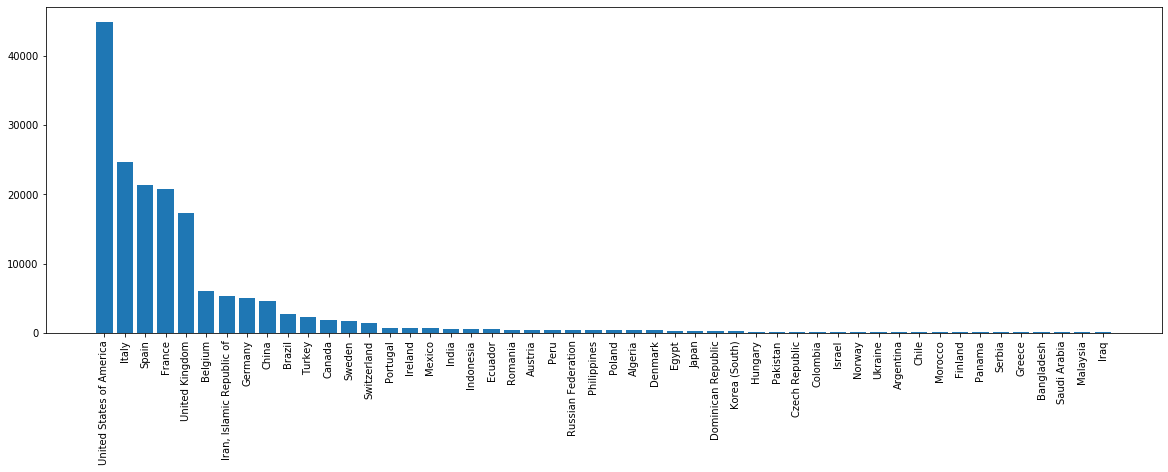

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=df.sort_values(by='TotalDeaths',ascending=False).head(50)
plt.bar(a1f['Country'],a1f['TotalDeaths'])
plt.xticks(rotation=90)
plt.show()

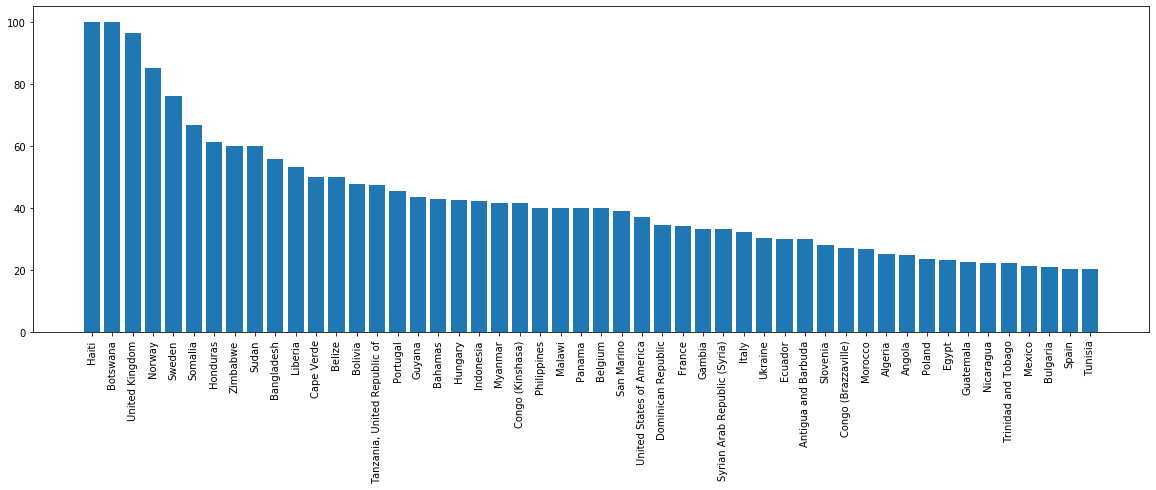

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=df.sort_values(by='DeathRate',ascending=False).head(50)
plt.bar(a1f['Country'],a1f['DeathRate'])
plt.xticks(rotation=90)
plt.show()

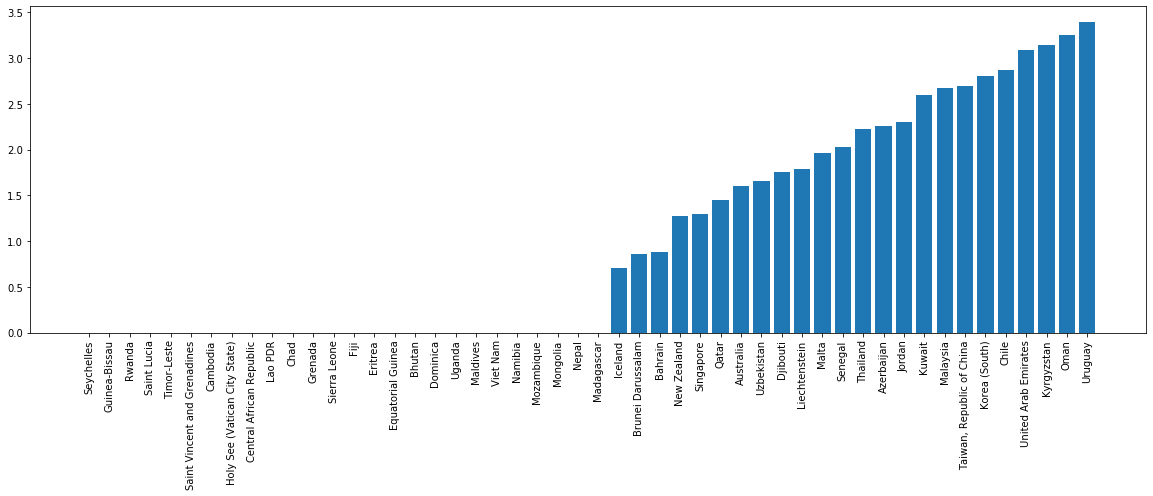

In [11]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=df.sort_values(by='RecoveredRate',ascending=False).head(50)
plt.bar(a1f['Country'],a1f['DeathRate'])
plt.xticks(rotation=90)
plt.show()

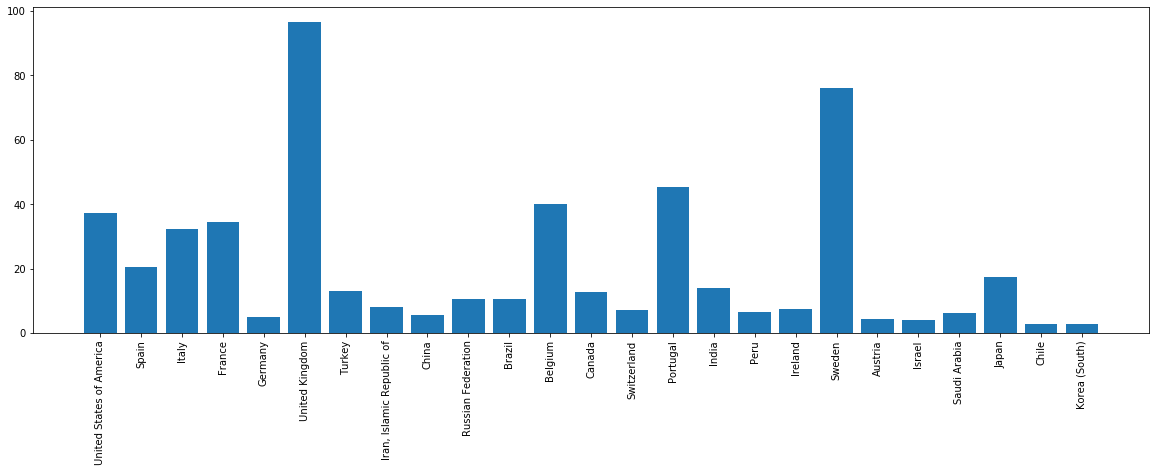

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
a1f=df.sort_values(by='TotalConfirmed',ascending=False).head(25)
plt.bar(a1f['Country'],a1f['DeathRate'])
plt.xticks(rotation=90)
plt.show()